In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()

In [7]:
def bench(n=2**20, q=2**20, source='std'):
    !make -s {source}
    if _exit_code != 0:
        raise Exception("Compilation failed")
    res = !./{source} {n} {q}
    #res = !g++ -O3 -march=native -D N={n} -D Q={q} {source} -o run && ./run
    duration = float(res[0].split()[0])
    check = int(res[1])
    print(f'{source:>18} {n:<7} {q:<7} {check:10} {duration}')
    return duration

In [ ]:
def plot(title=None, ylabel=None, path=None, ch=None, legend=False, ylim=None):
    if ch:
        lines = [
            (2**13, "32K"),
            (2**17, "512K"),
            (2**20, "4M"),
        ]

        for x, t in lines:
            #plt.text(x * 1.2, ch, t)
            plt.axvline(x=x, color='black', linestyle='--')

    plt.xscale('log', basex=2)
    plt.xlabel('Array size')

    if ylabel:
        plt.ylabel(ylabel)

    if title:
        plt.title(title, pad=12)

    if legend:
        plt.legend(loc='best')

    plt.ylim(bottom=0, top=ylim)
    plt.margins(0)

    if path:
        fig = plt.gcf()
        fig.savefig(path)
    plt.show()


plt.plot(ns, inc_res, color='darkred')
plot('for (int i = 0; i < n; i++) a[i]++', 'Increments per second ($10^9$)', 'inc.svg', 4.7)

In [29]:
tasks = [
    # source, name, color
    ('std', 'std::lower_bound', 'darkred'),
    ('branchless', 'branchless', 'darkblue'),
    ('eytzinger', 'eytzinger', 'darkgreen'),
    ('eytzinger-prefetch', 'eytzinger (with prefetching)', 'orange'),
    ('btree', 'B-tree (with SIMD)', 'purple'),
]

#ns = [2**14, 2**15]
ns = list(int(1.17**k) for k in range(30, 105))

results = [
    [bench(n=n, q=2**22, source=source) for n in ns]
    for source, _, _ in tasks
]

               std 2566    4194304 1113406510 98.88
               std 3002    4194304 1112798604 101.01
               std 3512    4194304  206412989 102.71
               std 4110    4194304 1209683439 105.48
               std 4808    4194304   67826828 107.11
               std 5626    4194304 1536755043 109.67
               std 6582    4194304  817068897 111.41
               std 7701    4194304 1589312975 112.9
               std 9011    4194304  215490644 115.69
               std 10543   4194304 1362773155 118.41
               std 12335   4194304  854835875 123.56
               std 14432   4194304  522038277 123.14
               std 16885   4194304 1852609160 125.45
               std 19756   4194304 1555506560 128.48
               std 23115   4194304  465435968 131.62
               std 27044   4194304 1639988596 133.54
               std 31642   4194304 2145651282 136.26
               std 37021   4194304  829198355 139.47
               std 43315   4194304   37754536 14

In [32]:
import pickle

with open('results.pkl', 'wb') as file:
    pickle.dump(results, file)

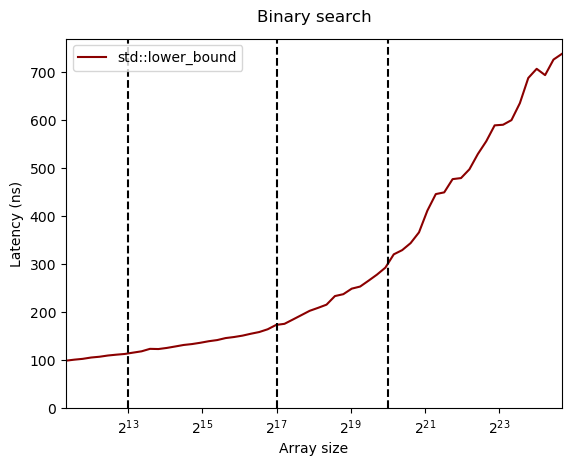

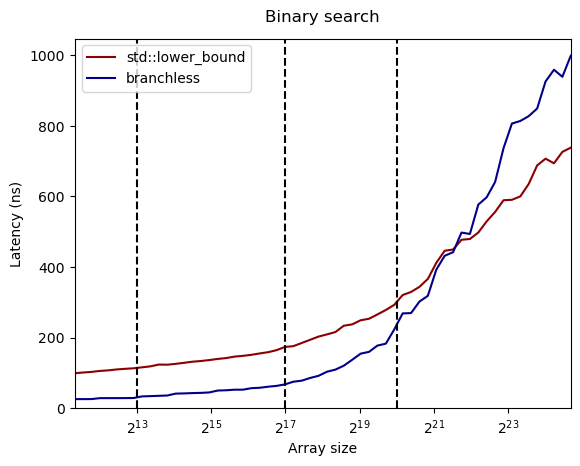

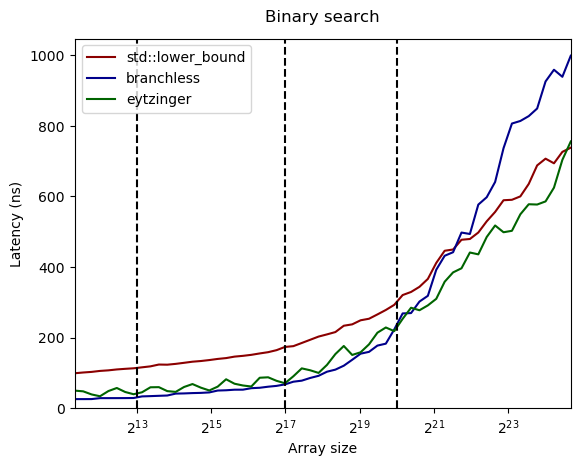

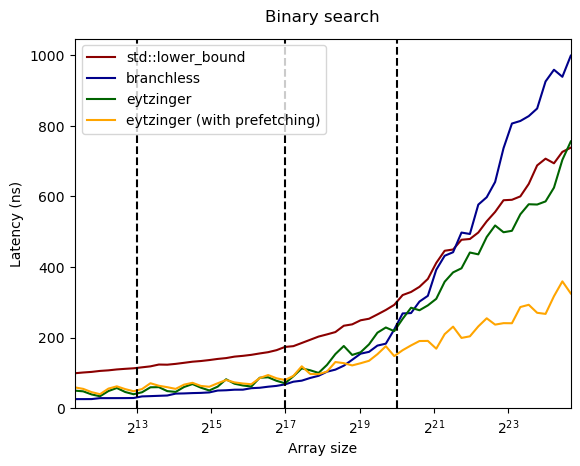

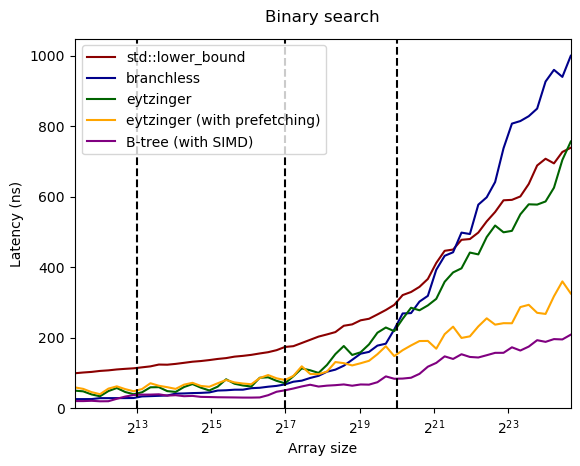

In [33]:
for i in range(5):
    for (source, name, color), latencies in list(zip(tasks, results))[:i + 1]:
        plt.plot(ns, latencies, color=color, label=name)
    
    plot('Binary search', 'Latency (ns)', tasks[i][0] + '.svg', 1, legend=True)

In [37]:
bench(n=2**23, q=2**22, source='btree')

             btree 8388608 4194304  778587145 164.17


164.17